# Part 2 of tank classification

As a reminder I collected images of several types of tanks: 
1. t-72 (Russia)
2. chieftain (Great Britain)
3. leclerc (France) 
4. type-99 (China)

In [1]:
# to produce the same results every time it is run
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

In [2]:
# Import libraries
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

**First of all read the files from path. We are interested in first 4 paths**

In [66]:
# path = r'tank_photo'
# files_all = os.listdir(path)
# folder_paths = [path + '\\'+ folder for folder in files_all[:4]]

# images_path = []
# images_all = []
# for fold in folder_paths:
#     f_in_folder = os.listdir(fold)
#     imgs = list(filter(lambda x: x.endswith('.jpg'), f_in_folder))
#     img_path = [fold + '\\'+ img for img in imgs]
#     images_all.append(imgs)
#     images_path.extend(img_path)

In [69]:
# # Print number of images of every  class
# s = 0
# for i in range(len(images_all)):
#     print(f'Number of images of tank {files_all[i]}: {len(images_all[i])}.')
#     s = len(images_all[i]) + s
# print(f'Total number of images: {s}.')

Количество изображений танка !downloaded_chieftain: 250.
Количество изображений танка !downloaded_leclerc: 232.
Количество изображений танка !downloaded_t-72: 259.
Количество изображений танка !downloaded_type-99: 230.
Общее количество изображений: 971.


In [71]:
# image_names = []
# for img_name in images_path:
#     image_names.append(img_name.split('\\')[-1])
    
# image_names[:5]

['goo_chieftain-1.jpg',
 'goo_chieftain-10.jpg',
 'goo_chieftain-100.jpg',
 'goo_chieftain-101.jpg',
 'goo_chieftain-102.jpg']

In [72]:
# import re
# image_labels = []
# for img_name in image_names:
#     image_labels.append(re.split('-\d+.jpg',img_name.split('goo_')[-1])[0])
    
# image_labels[-5:]

['type-99', 'type-99', 'type-99', 'type-99', 'type-99']

In [73]:
# dict_labels = {'image_name': image_names,
#                'tank_type':image_labels}

In [74]:
# labels = pd.DataFrame.from_dict(dict_labels)
# labels[:5]

image_name  tank_type
0    goo_chieftain-1.jpg  chieftain
1   goo_chieftain-10.jpg  chieftain
2  goo_chieftain-100.jpg  chieftain
3  goo_chieftain-101.jpg  chieftain
4  goo_chieftain-102.jpg  chieftain

In [75]:
# labels['img_link'] = images_path
# labels[:5]

image_name  tank_type  \
0    goo_chieftain-1.jpg  chieftain   
1   goo_chieftain-10.jpg  chieftain   
2  goo_chieftain-100.jpg  chieftain   
3  goo_chieftain-101.jpg  chieftain   
4  goo_chieftain-102.jpg  chieftain   

                                            img_link  
0  tank_photo\!downloaded_chieftain\goo_chieftain...  
1  tank_photo\!downloaded_chieftain\goo_chieftain...  
2  tank_photo\!downloaded_chieftain\goo_chieftain...  
3  tank_photo\!downloaded_chieftain\goo_chieftain...  
4  tank_photo\!downloaded_chieftain\goo_chieftain...

In [76]:
# labels.to_csv('labels.csv', encoding='utf-8', index=False)

In [3]:
#Load saved as csv file dataframe 
df = pd.read_csv('labels.csv')
df.head()

image_name  tank_type  \
0    goo_chieftain-1.jpg  chieftain   
1   goo_chieftain-10.jpg  chieftain   
2  goo_chieftain-100.jpg  chieftain   
3  goo_chieftain-101.jpg  chieftain   
4  goo_chieftain-102.jpg  chieftain   

                                            img_link  
0  tank_photo\!downloaded_chieftain\goo_chieftain...  
1  tank_photo\!downloaded_chieftain\goo_chieftain...  
2  tank_photo\!downloaded_chieftain\goo_chieftain...  
3  tank_photo\!downloaded_chieftain\goo_chieftain...  
4  tank_photo\!downloaded_chieftain\goo_chieftain...

**Since images in df are ordered by class, let's shuffle them**

In [4]:
df = df.sample(frac=1, random_state=42, replace=True) # use random_state to ensure the reproducibility of the examples
df.head(10)

image_name  tank_type  \
102  goo_chieftain-198.jpg  chieftain   
435     goo_leclerc-57.jpg    leclerc   
860    goo_type-99-212.jpg    type-99   
270    goo_leclerc-117.jpg    leclerc   
106  goo_chieftain-200.jpg  chieftain   
71   goo_chieftain-166.jpg  chieftain   
700        goo_t-72-62.jpg       t-72   
20   goo_chieftain-117.jpg  chieftain   
614       goo_t-72-218.jpg       t-72   
121  goo_chieftain-215.jpg  chieftain   

                                              img_link  
102  tank_photo\!downloaded_chieftain\goo_chieftain...  
435  tank_photo\!downloaded_leclerc\goo_leclerc-57.jpg  
860  tank_photo\!downloaded_type-99\goo_type-99-212...  
270  tank_photo\!downloaded_leclerc\goo_leclerc-117...  
106  tank_photo\!downloaded_chieftain\goo_chieftain...  
71   tank_photo\!downloaded_chieftain\goo_chieftain...  
700        tank_photo\!downloaded_t-72\goo_t-72-62.jpg  
20   tank_photo\!downloaded_chieftain\goo_chieftain...  
614       tank_photo\!downloaded_t-72\goo_t-72-218.jpg  
121  tank_photo\!downloaded_chieftain\goo_chieftain...

In [5]:
# Reset indexes
df.reset_index(drop=True, inplace=True)
df[:5]

image_name  tank_type  \
0  goo_chieftain-198.jpg  chieftain   
1     goo_leclerc-57.jpg    leclerc   
2    goo_type-99-212.jpg    type-99   
3    goo_leclerc-117.jpg    leclerc   
4  goo_chieftain-200.jpg  chieftain   

                                            img_link  
0  tank_photo\!downloaded_chieftain\goo_chieftain...  
1  tank_photo\!downloaded_leclerc\goo_leclerc-57.jpg  
2  tank_photo\!downloaded_type-99\goo_type-99-212...  
3  tank_photo\!downloaded_leclerc\goo_leclerc-117...  
4  tank_photo\!downloaded_chieftain\goo_chieftain...

In [6]:
#Save links to list
img_paths = list(df.img_link)
len(img_paths)

971

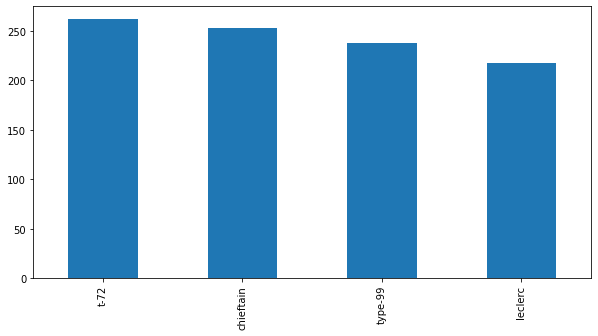

In [6]:
df.tank_type.value_counts().plot.bar(figsize=(10, 5));

As we can see our classes are  almost balanced

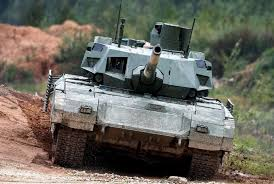

In [7]:
# We can display our image
from IPython.display import Image,display
display(Image(img_paths[10]))

Now, we have to work with our labels

In [8]:
# Convert labels to np array
labels = df.tank_type.to_numpy()
 
# labels, len(labels)

In [9]:
# Check unique types of tanks
unique_types = np.unique(labels)
len(unique_types)

4

In [10]:
#Convert unique type to boolean array
boolean_labels = [label == unique_types for label in labels]
boolean_labels[:5]

[array([ True, False, False, False]),
 array([False,  True, False, False]),
 array([False, False, False,  True]),
 array([False,  True, False, False]),
 array([ True, False, False, False])]

In [11]:
len(boolean_labels)

971

In [12]:
# We can convert boolean types in integers

print(labels[0]) # Check first element
print(np.where(unique_types==labels[0])) # index of label

print(boolean_labels[0].argmax()) # index of label in boolean array
print(boolean_labels[0].astype(int)) # there is one where chieftain appears

chieftain
(array([0], dtype=int64),)
0
[1 0 0 0]


**Now, we can assign to X and y**

In [13]:
X = img_paths
y = boolean_labels

**We do not have train, validation and test datasts let's split our X and y**

In [14]:
# First we split to test data
from sklearn.model_selection import train_test_split

X_tr_val, X_test, y_tr_val, y_test = train_test_split(X, 
                                                      y,
                                                      stratify=y, # to keep balance of clasess
                                                      test_size=0.1,
                                                      random_state=42)

In [15]:
(len(X_tr_val), len(X_test)), (len(y_tr_val), len(y_test))

((873, 98), (873, 98))

**Now devide into train and validation**

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_tr_val, 
                                                  y_tr_val,
                                                  stratify=y_tr_val, # to keep balance of clasess
                                                  test_size=0.2,
                                                  random_state=42)

In [17]:
(len(X_train), len(X_val), len(X_test)), (len(y_train), len(y_val),  len(y_test))

((698, 175, 98), (698, 175, 98))

In [18]:
# Convert probabiities into labels
def get_pred_label(prediction_probabilities):
    """
    Convert array of probabilities in labels
    """
    return unique_types[np.argmax(prediction_probabilities)]

**Let's see if training, validation and test datasets are in balance**

In [56]:
y_tr_label = [get_pred_label(y_train[i]) for i in range(len(y_train))]

y_val_label = [get_pred_label(y_val[j]) for j in range(len(y_val))]

y_test_label = [get_pred_label(y_test[k]) for k in range(len(y_test))]            

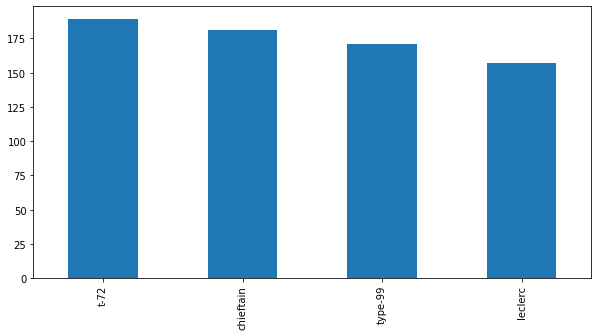

In [58]:
pd.Series(y_tr_label).value_counts().plot.bar(figsize=(10, 5));

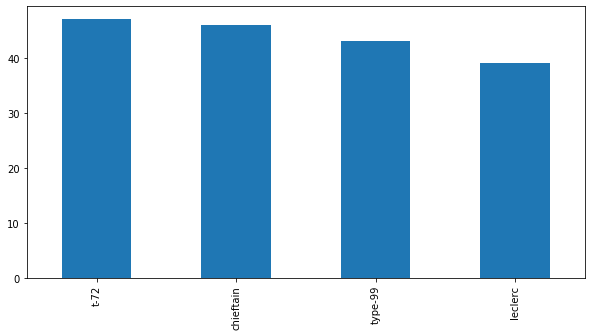

In [59]:
pd.Series(y_val_label).value_counts().plot.bar(figsize=(10, 5));

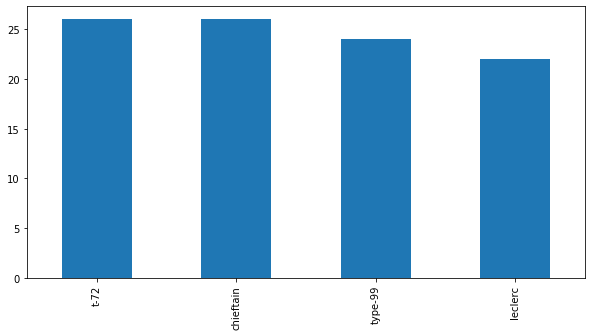

In [60]:
pd.Series(y_test_label).value_counts().plot.bar(figsize=(10, 5));

In [93]:
X_train[:5], y_train[:5]

(['tank_photo\\!downloaded_chieftain\\goo_chieftain-148.jpg',
  'tank_photo\\!downloaded_leclerc\\goo_leclerc-241.jpg',
  'tank_photo\\!downloaded_t-72\\goo_t-72-215.jpg',
  'tank_photo\\!downloaded_t-72\\goo_t-72-174.jpg',
  'tank_photo\\!downloaded_chieftain\\goo_chieftain-68.jpg'],
 [array([ True, False, False, False]),
  array([False,  True, False, False]),
  array([False, False,  True, False]),
  array([False, False,  True, False]),
  array([ True, False, False, False])])

In [19]:
import tensorflow as tf

**Now we'll use method** `tf.image.resize_with_pad()`

In [20]:
# Function for converting  images to tensors

# image size
IMG_height = 200
IMG_width = 200


def process_image(image_path, img_height=IMG_height, img_width=IMG_width):
    """
    input is the image path, out is image as a tensor
      """
    # read the image
    image = tf.io.read_file(image_path)
    # jpeg to tensor with 3 channels
    image = tf.image.decode_jpeg(image, channels=3)
    # normalize the image (devide by 255)
    image = tf.image.convert_image_dtype(image, tf.float32)
    # resize image with pad
    image = tf.image.resize_with_pad(image, IMG_height, IMG_width, 
                                     method=tf.image.ResizeMethod.BILINEAR,
                                     antialias=False)
    # image = tf.image.resize(image, size=(IMG_height, IMG_width))

    return image

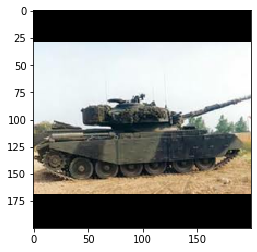

In [21]:
# Let's see the preproccesed image
pic = process_image(X_train[0])
pic1 = tf.keras.preprocessing.image.img_to_array(pic)*255


plt.imshow((pic1).astype(np.uint8))
plt.show()

In [22]:
# function that return tuple (image, label)

def get_image_label(image_path, label):
    """
    inputs are file_path and label return tuple (image, label).
    """

    image = process_image(image_path)
    return image, label

In [23]:
# Check how it works
# (process_image(X[7]), tf.constant(y[7]))

In [24]:
# Define batch_size
BATCH_SIZE = 32

# function to return batches of data

def create_data_batches (X, y, batch_size=BATCH_SIZE, val_test_data=False):
    """
    Creates batces from X and y
    If input is train data then suffle, if input is val or test data do not suffle
    """
  # if test data is validation or test then
    if val_test_data:
        print("Validation or test data batches are creating...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # paths to img
                                                   tf.constant(y))) #  labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)       
        return data_batch

    else:
        print("Training data batches are creating...")    
        # Turn into tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y))) 
        
        # Shuffle data
        data = data.shuffle(buffer_size=len(X))

        # Create tuple (image, label) 
        data = data.map(get_image_label)

        # creating batches
        data_batch = data.batch(BATCH_SIZE)

        return data_batch


In [25]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, val_test_data=True)

Training data batches are creating...
Validation or test data batches are creating...


**There is another way to resize images using PIL**

In [41]:
from PIL import Image

In [ ]:
ImageFile = Image.open(X_train[0], 'r')

In [126]:
def resize_image(img, size):
    """
    Resize PIL image

    Resizes image to be square with sidelength size. Pads with black if needed.
    """
    # Resize
    n_x, n_y = img.size
    if n_y > n_x:
        n_y_new = size
        n_x_new = int(size * n_x / n_y + 0.5)
    else:
        n_x_new = size
        n_y_new = int(size * n_y / n_x + 0.5)

    img_res = img.resize((n_x_new, n_y_new), resample=Image.BICUBIC)

    # Pad the borders to create a square image
    img_pad = Image.new('RGB', (size, size), (0, 0, 0))
    ulc = ((size - n_x_new) // 2, (size - n_y_new) // 2)
    img_pad.paste(img_res, ulc)

    return img_pad

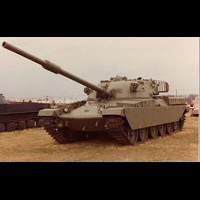

In [96]:
resize_image(ImageFile, 200)

## Create and train model. We'll use transfer learning. Base model is InceptionV3.

In [35]:
from keras.applications.inception_v3 import InceptionV3

In [36]:
inc_model = InceptionV3(weights="imagenet", 
                        include_top=False, 
                        input_shape=(IMG_height,IMG_width,3))
                        
print("number of layers in the model : ", len(inc_model.layers))

number of layers in the model :  311


Top layers are not included, we'll replace them with followings:

In [37]:
from keras.layers import Dropout, Dense, GlobalAveragePooling2D

In [38]:
x = inc_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x) # we will have 4 classes

In [43]:
from keras.models import Model
from keras.optimizers import SGD, Adam

In [40]:
# l = np.array(range(0,316))
# l[:52]

In [44]:
# Create final model

model_ = Model(inputs=inc_model.input, outputs=predictions)

# Do not train first layers

for layer in model_.layers[:52]:
# For layer in model_.layers[:312]:
    layer.trainable = False
    
# Model compile

# model_.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model_.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, amsgrad=False), 
               loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
len(model_.layers)

316

In [46]:
from keras.callbacks import ModelCheckpoint

May be it is more commonly to use as monitor accuracy https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [47]:
# callback ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='weights.best.inc.hdf5', verbose=1, save_best_only=True)

In [48]:
%time
# train model
num_epochs = 70
hist = model_.fit(x=train_data,
                 epochs=num_epochs,
                 validation_data=val_data,
                 validation_freq=1,
                 steps_per_epoch=round(len(X_train)/BATCH_SIZE),
                 callbacks=[checkpointer],
                 verbose=1)

Wall time: 0 ns
Epoch 1/70
22/22 [==============================] - ETA: 0s - loss: 1.4908 - accuracy: 0.2593
Epoch 00001: val_loss improved from inf to 1.41936, saving model to weights.best.inc.hdf5
22/22 [==============================] - 220s 10s/step - loss: 1.4908 - accuracy: 0.2593 - val_loss: 1.4194 - val_accuracy: 0.3086
Epoch 2/70
22/22 [==============================] - ETA: 0s - loss: 1.3768 - accuracy: 0.2937
Epoch 00002: val_loss improved from 1.41936 to 1.38047, saving model to weights.best.inc.hdf5
22/22 [==============================] - 226s 10s/step - loss: 1.3768 - accuracy: 0.2937 - val_loss: 1.3805 - val_accuracy: 0.3886
Epoch 3/70
22/22 [==============================] - ETA: 0s - loss: 1.2636 - accuracy: 0.4226
Epoch 00003: val_loss improved from 1.38047 to 1.34583, saving model to weights.best.inc.hdf5
22/22 [==============================] - 220s 10s/step - loss: 1.2636 - accuracy: 0.4226 - val_loss: 1.3458 - val_accuracy: 0.3486
Epoch 4/70
22/22 [=============

Epoch 58/70
22/22 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 00058: val_loss did not improve from 0.66654
22/22 [==============================] - 221s 10s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.7811 - val_accuracy: 0.7314
Epoch 59/70
22/22 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 00059: val_loss did not improve from 0.66654
22/22 [==============================] - 218s 10s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.7834 - val_accuracy: 0.7200
Epoch 60/70
22/22 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 00060: val_loss did not improve from 0.66654
22/22 [==============================] - 204s 9s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.7817 - val_accuracy: 0.7257
Epoch 61/70
22/22 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 00061: val_loss did not improve from 0.66654
22/22 [=================

In [54]:
import datetime
import os

In [55]:
# Define function for save model
def save_model(model, suffix=None):
    """
    Save the model in directory models and add text to it name
   
    """
    # Create path to model and current time
    directory = r'C:\Users\User\Jupiter\usefull notebooks\models'
    modeldir = os.path.join(directory, 
                            datetime.datetime.now().strftime("%d-%m-%Y_%H-%M-%S"))
    model_path = modeldir + "_" + suffix + ".h5" # model  extension
    print(f"Saving model in: {model_path}...")
    model.save(model_path)
    return model_path

In [56]:
save_model(model_, suffix='zero_pad_n_epoch-70_adam')

Сохранение модели в: C:\Users\User\Jupiter\usefull notebooks\models\05-10-2020_16-41-22_zero_pad_n_epoch-70_adam.h5...


'C:\\Users\\User\\Jupiter\\usefull notebooks\\models\\05-10-2020_16-41-22_zero_pad_n_epoch-70_adam.h5'

In [49]:
# Define function for plotting loss and accuracy
def plot_loss_acc(hist):
    '''
    Take for input history and plot loss and accuracy
    '''
    met_1 = ['loss', 'accuracy' ]
    met_2 = ['val_loss', 'val_accuracy']
    title = ['Loss function', 'Accuracy']
    
    fig, axs = plt.subplots(2)
    fig.suptitle('Model metrics')
    
    for i in range(2):
        axs[i].plot(hist.history[met_1[i]], label='train')
        axs[i].plot(hist.history[met_2[i]], label='validation')
        axs[i].legend()
        axs[i].set_title(title[i])

    fig.tight_layout(pad=2.0);

**There are metrics below for slightly different models. Description of changes in models are prvided in comments**

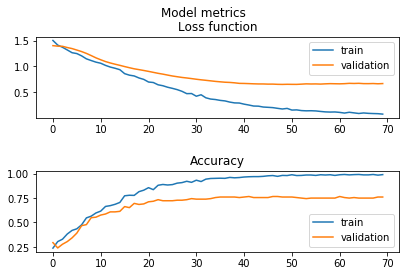

In [37]:
#Plot the loss and accuracy for 70 epochs
plot_loss_acc(hist)

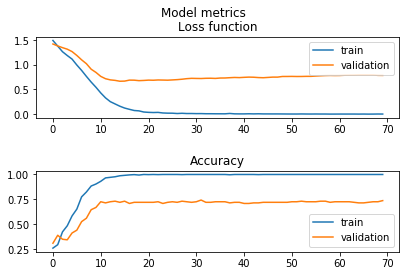

In [50]:
#Plot the loss and accuracy for 70 epochs wtith adam
plot_loss_acc(hist)

**As we can see with Adam optimizer model convergence is faster**

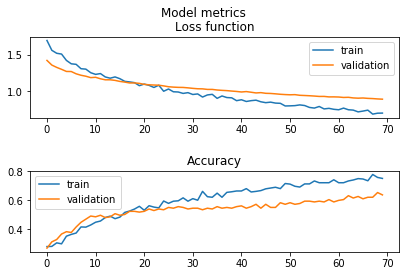

In [39]:
#Plot the loss and accuracy for 70 epochs train only 5 layers
plot_loss_acc(hist)

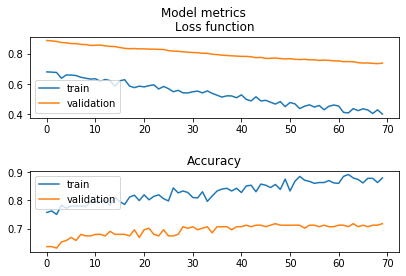

In [41]:
#Plot the loss and accuracy for 70+70 epochs train only 5 layers
plot_loss_acc(hist)

**After playing with some hyperparameters of model I so no improving model accuracy and decided to recheck labels and found that several images apperaed in different classes. I cleaned off dataset.**

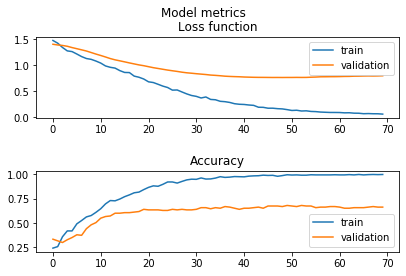

In [114]:
#Plot the loss and accuracy for 70 clearned data
plot_loss_acc(hist)

**As it can be seen there was no efect on accuray, I think I should recheck another one more time with specialists and add more images to dataset**

In [51]:
test_data = create_data_batches(X_test, y_test, val_test_data=True)

Validation or test data batches are creating...


In [52]:
# Make predictios on test data
predictions = model_.predict(test_data, verbose=1)

4/4 [==============================] - 5s 1s/step


In [53]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model_.evaluate(test_data, batch_size=BATCH_SIZE)
print("test loss, test acc:", results)

Evaluate on test data
4/4 [==============================] - 5s 1s/step - loss: 0.7787 - accuracy: 0.7653
test loss, test acc: [0.7786859273910522, 0.7653061151504517]


In [118]:
# Convert probabiities into labels
def get_pred_label(prediction_probabilities):
    """
    Convert array of probabilities in labels
    """
    return unique_types[np.argmax(prediction_probabilities)]

# Get label from array of probabilities
pred_label = get_pred_label(predictions[4])
pred_label

'leclerc'

In [119]:
y_pred = [get_pred_label(predictions[p]) for p in range(len(predictions))]

In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
y_test_non_category = [ np.argmax(t) for t in y_test ]

y_test_types = [unique_types[y_test_non_category[i]] for i in range(len(y_test_non_category))]


conf_mat = confusion_matrix(y_test_types, y_pred, labels=unique_types)

In [122]:
def plot_cm(y_true, y_pred, figsize=(6,6)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

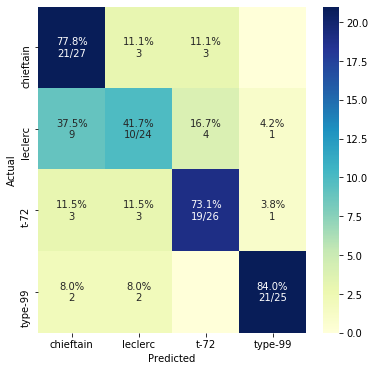

In [47]:
plot_cm(y_test_types, y_pred)

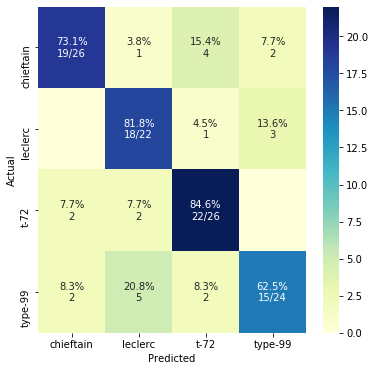

In [123]:
# CM for cleaned data
plot_cm(y_test_types, y_pred)

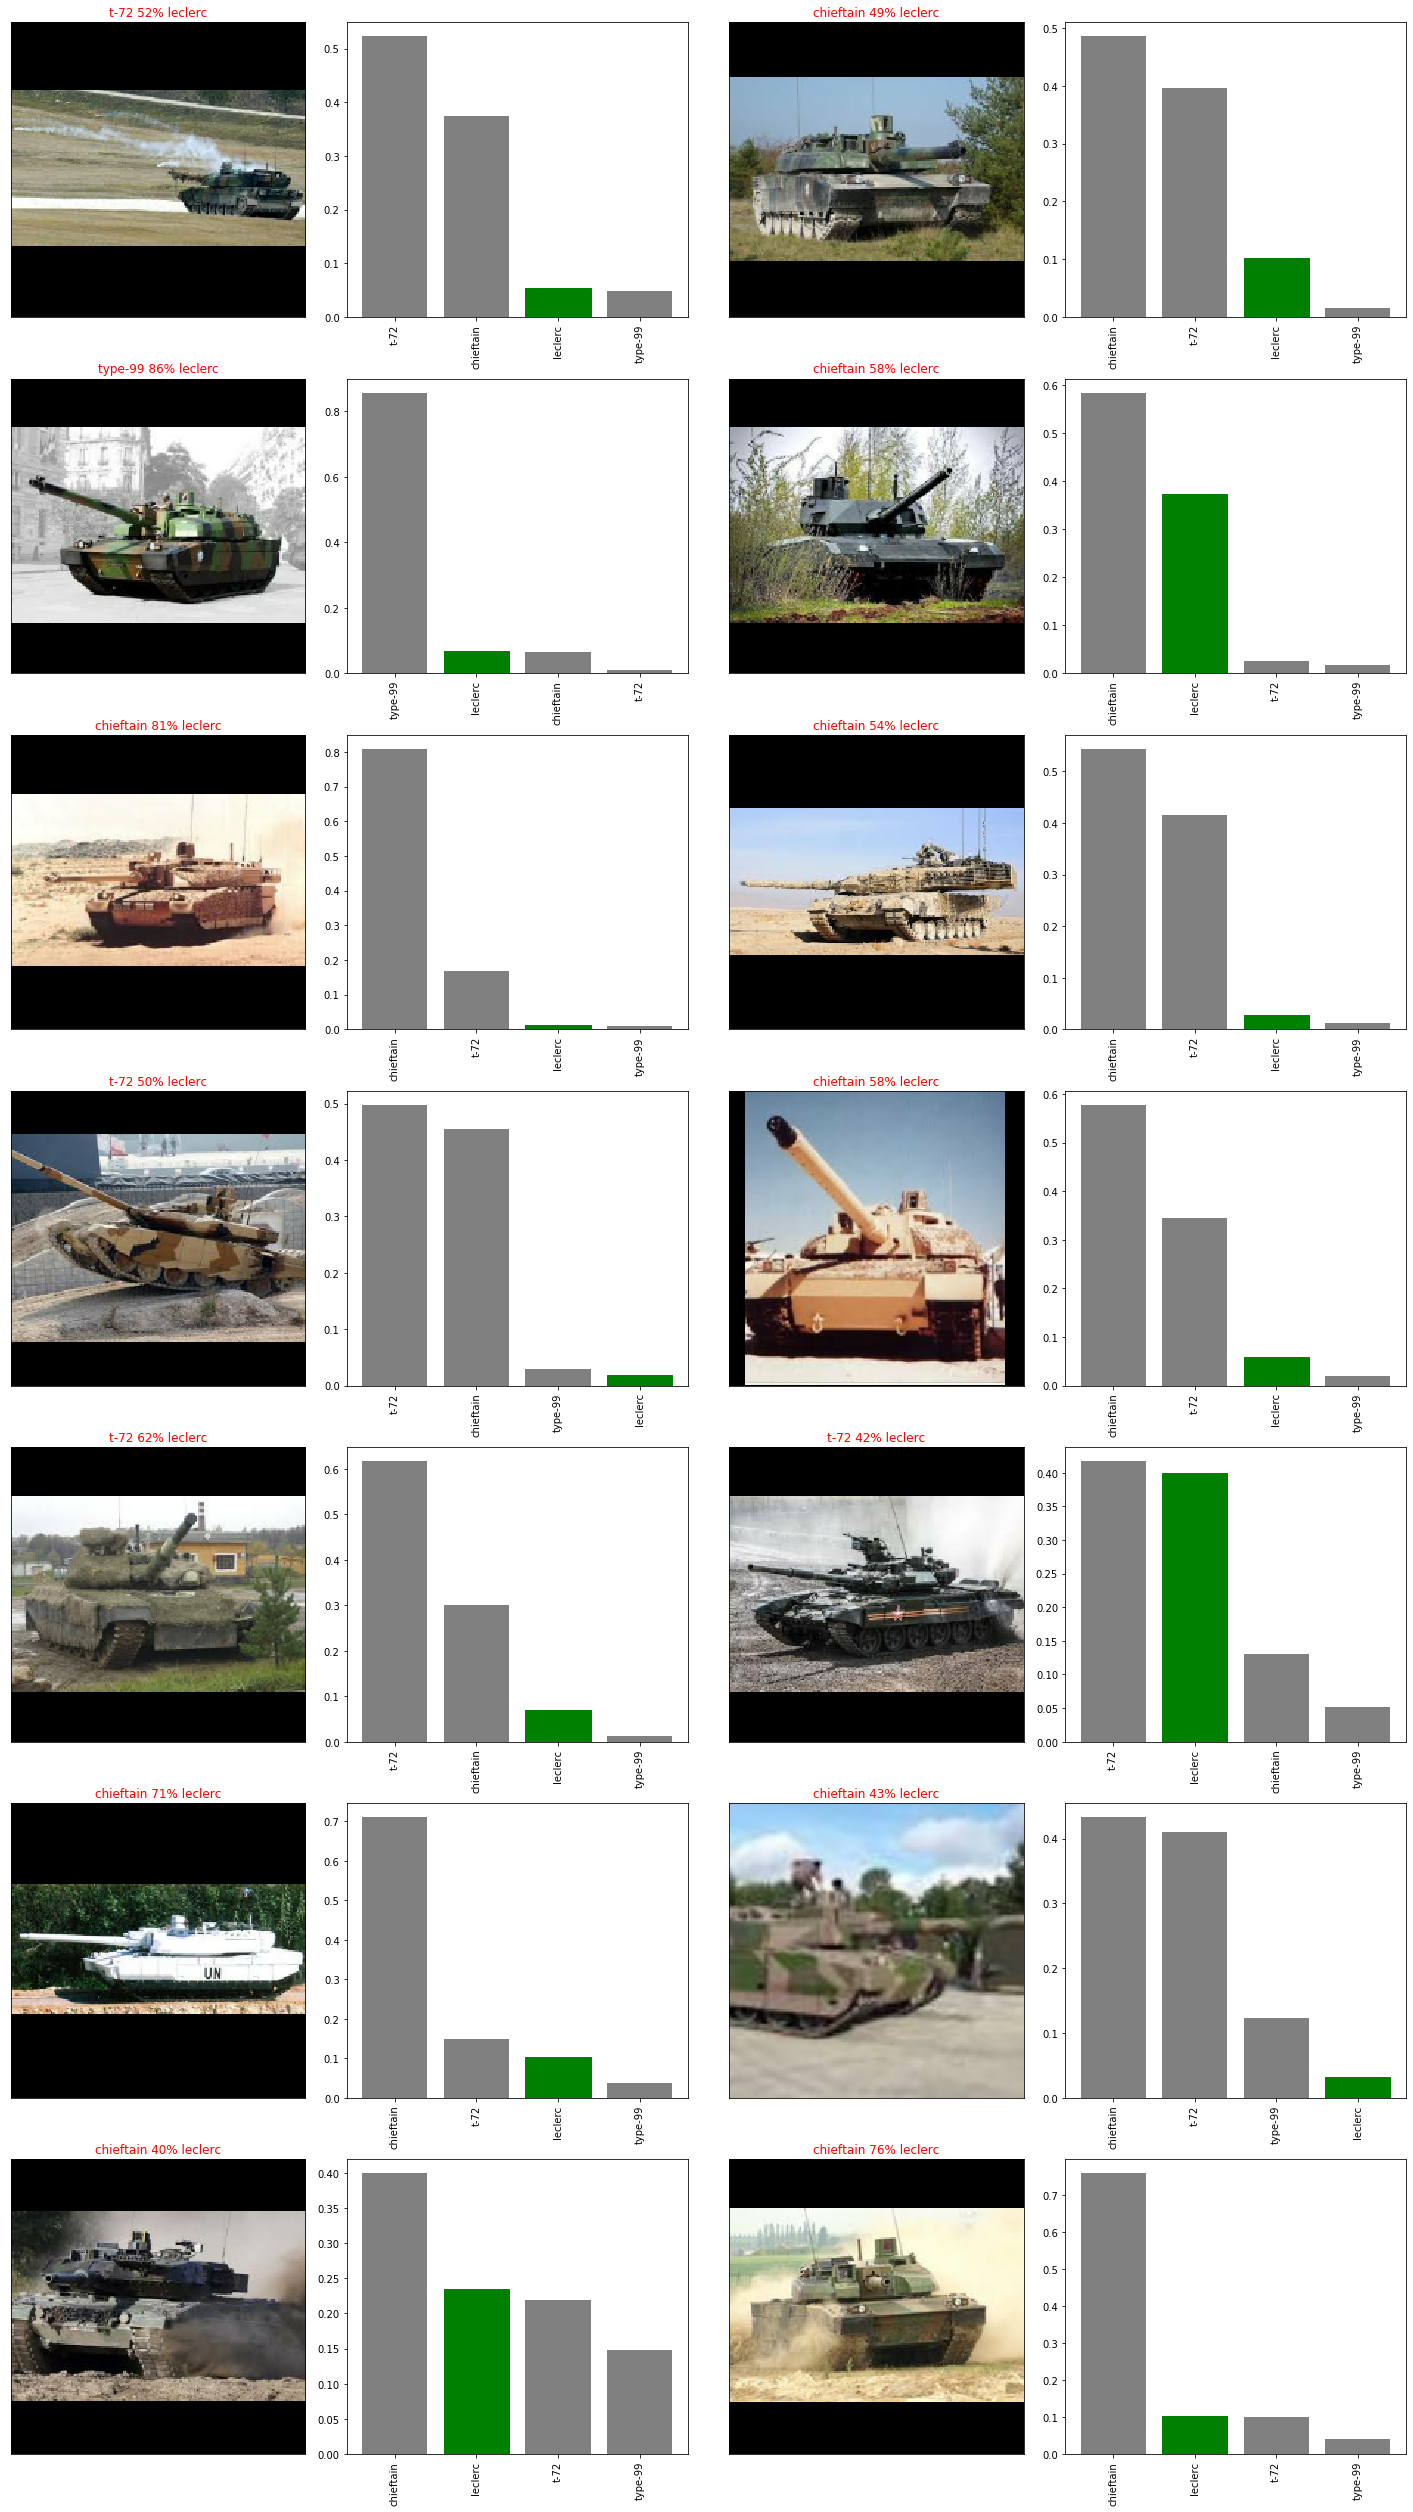

In [56]:
plot_and_conf(predictions, test_labels, test_images, 7, 2, 'leclerc')

## Use data augmentation

In [64]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

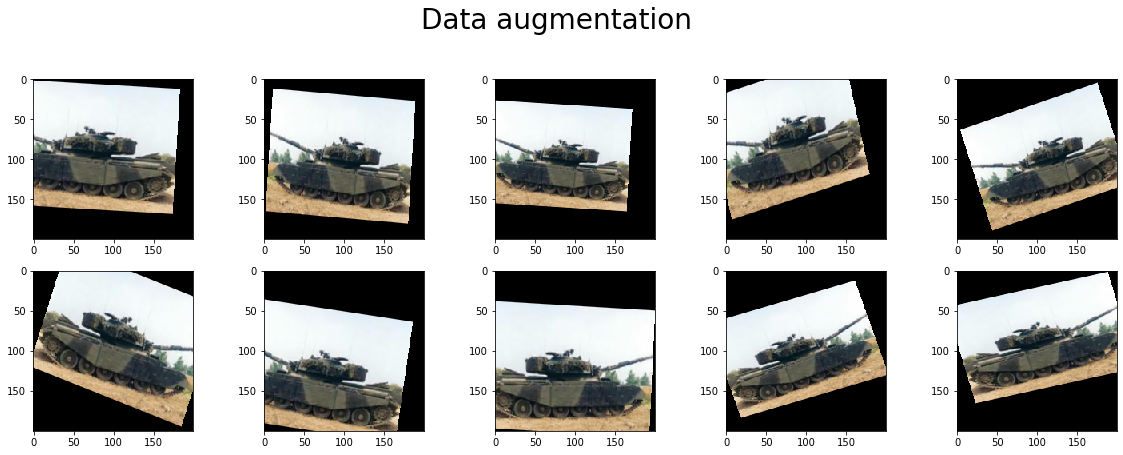

In [128]:
# generate image generator for data augmentation

datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.15, 
                             height_shift_range=0.15, shear_range=0.15, 
                             zoom_range=0.15, horizontal_flip=True, fill_mode='constant', cval=0.0)

x = np.array(process_image(X_train[0]))
x = x.reshape((1,) + x.shape)

# plot 10 augmented images of the loaded image

plt.figure(figsize=(20,10))
plt.suptitle("Data augmentation", fontsize=28)

i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.subplot(3,5,i+1)
    plt.grid(False)
    plt.imshow(batch.reshape(IMG_height,IMG_width, 3))
    
    if i==9:
        break
    i = i+1
    
plt.show()

In [61]:
from keras.applications.inception_v3 import preprocess_input

In [130]:
# %%time
# X_tr_proc = np.array([process_image(X_train[i]) for i in range(len(X_train))])

Wall time: 4h 45min 48s


In [131]:
# # save numpy array as npy file
# from numpy import save
# # save to npy file
# save('X_tr_proc.npy', X_tr_proc)

In [62]:
X_tr_proc = np.load('X_tr_proc.npy')
X_tr_proc.shape

(698, 200, 200, 3)

In [65]:
# build train data generator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                   rotation_range=20, width_shift_range=0.15, 
                                   height_shift_range=0.15, shear_range=0.15, 
                                   zoom_range=0.15, horizontal_flip=True, fill_mode='constant', cval=0.0)

train_datagen.fit(X_tr_proc)

train_generator = train_datagen.flow(X_tr_proc, y_train, batch_size=BATCH_SIZE)

Prepare validation data

In [133]:
# %%time
# X_val_proc = np.array([process_image(X_val[i]) for i in range(len(X_val))])

Wall time: 1h 10min 38s


In [137]:
# save to npy file`
# np.save('X_val_proc.npy', X_val_proc)

In [66]:
X_val_proc = np.load('X_val_proc.npy')
X_val_proc.shape

(175, 200, 200, 3)

In [67]:
# build valid data generator

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_datagen.fit(X_val_proc)

valid_generator = valid_datagen.flow(X_val_proc, y_val, batch_size=BATCH_SIZE)

In [74]:
%%time
num_epochs = 150
hist = model_.fit_generator(train_generator, 
                            validation_data=valid_generator, 
                            steps_per_epoch=round(len(X_train)/BATCH_SIZE), 
                            epochs=num_epochs, 
                            callbacks=[checkpointer], 
                            validation_freq=1,
                            verbose=1)

Epoch 1/150
22/22 [==============================] - ETA: 0s - loss: 0.5121 - accuracy: 0.8138
Epoch 00001: val_loss did not improve from 1.10177
22/22 [==============================] - 227s 10s/step - loss: 0.5121 - accuracy: 0.8138 - val_loss: 1.2284 - val_accuracy: 0.6057
Epoch 2/150
22/22 [==============================] - ETA: 0s - loss: 0.4684 - accuracy: 0.8410
Epoch 00002: val_loss did not improve from 1.10177
22/22 [==============================] - 206s 9s/step - loss: 0.4684 - accuracy: 0.8410 - val_loss: 1.2212 - val_accuracy: 0.6343
Epoch 3/150
22/22 [==============================] - ETA: 0s - loss: 0.5206 - accuracy: 0.8152
Epoch 00003: val_loss did not improve from 1.10177
22/22 [==============================] - 206s 9s/step - loss: 0.5206 - accuracy: 0.8152 - val_loss: 1.2160 - val_accuracy: 0.6286
Epoch 4/150
22/22 [==============================] - ETA: 0s - loss: 0.4586 - accuracy: 0.8324
Epoch 00004: val_loss did not improve from 1.10177
22/22 [==================

Epoch 31/150
22/22 [==============================] - ETA: 0s - loss: 0.3097 - accuracy: 0.8926
Epoch 00031: val_loss did not improve from 1.10177
22/22 [==============================] - 219s 10s/step - loss: 0.3097 - accuracy: 0.8926 - val_loss: 1.2165 - val_accuracy: 0.6629
Epoch 32/150
22/22 [==============================] - ETA: 0s - loss: 0.3015 - accuracy: 0.8997
Epoch 00032: val_loss did not improve from 1.10177
22/22 [==============================] - 210s 10s/step - loss: 0.3015 - accuracy: 0.8997 - val_loss: 1.2023 - val_accuracy: 0.6343
Epoch 33/150
22/22 [==============================] - ETA: 0s - loss: 0.3305 - accuracy: 0.9026
Epoch 00033: val_loss did not improve from 1.10177
22/22 [==============================] - 206s 9s/step - loss: 0.3305 - accuracy: 0.9026 - val_loss: 1.1931 - val_accuracy: 0.6400
Epoch 34/150
22/22 [==============================] - ETA: 0s - loss: 0.3061 - accuracy: 0.8997
Epoch 00034: val_loss did not improve from 1.10177
22/22 [=============

Epoch 61/150
22/22 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.9398
Epoch 00061: val_loss did not improve from 1.10177
22/22 [==============================] - 209s 9s/step - loss: 0.1959 - accuracy: 0.9398 - val_loss: 1.2899 - val_accuracy: 0.6743
Epoch 62/150
22/22 [==============================] - ETA: 0s - loss: 0.1590 - accuracy: 0.9542
Epoch 00062: val_loss did not improve from 1.10177
22/22 [==============================] - 207s 9s/step - loss: 0.1590 - accuracy: 0.9542 - val_loss: 1.3247 - val_accuracy: 0.6629
Epoch 63/150
22/22 [==============================] - ETA: 0s - loss: 0.2156 - accuracy: 0.9255
Epoch 00063: val_loss did not improve from 1.10177
22/22 [==============================] - 206s 9s/step - loss: 0.2156 - accuracy: 0.9255 - val_loss: 1.3446 - val_accuracy: 0.6686
Epoch 64/150
22/22 [==============================] - ETA: 0s - loss: 0.2246 - accuracy: 0.9255
Epoch 00064: val_loss did not improve from 1.10177
22/22 [===============

Epoch 91/150
22/22 [==============================] - ETA: 0s - loss: 0.1632 - accuracy: 0.9470
Epoch 00091: val_loss did not improve from 1.10177
22/22 [==============================] - 208s 9s/step - loss: 0.1632 - accuracy: 0.9470 - val_loss: 1.3079 - val_accuracy: 0.6971
Epoch 92/150
22/22 [==============================] - ETA: 0s - loss: 0.1392 - accuracy: 0.9570
Epoch 00092: val_loss did not improve from 1.10177
22/22 [==============================] - 204s 9s/step - loss: 0.1392 - accuracy: 0.9570 - val_loss: 1.3118 - val_accuracy: 0.6914
Epoch 93/150
22/22 [==============================] - ETA: 0s - loss: 0.1450 - accuracy: 0.9556
Epoch 00093: val_loss did not improve from 1.10177
22/22 [==============================] - 205s 9s/step - loss: 0.1450 - accuracy: 0.9556 - val_loss: 1.3120 - val_accuracy: 0.6914
Epoch 94/150
22/22 [==============================] - ETA: 0s - loss: 0.1376 - accuracy: 0.9542
Epoch 00094: val_loss did not improve from 1.10177
22/22 [===============

Epoch 121/150
22/22 [==============================] - ETA: 0s - loss: 0.1020 - accuracy: 0.9670
Epoch 00121: val_loss did not improve from 1.10177
22/22 [==============================] - 206s 9s/step - loss: 0.1020 - accuracy: 0.9670 - val_loss: 1.3326 - val_accuracy: 0.7314
Epoch 122/150
22/22 [==============================] - ETA: 0s - loss: 0.0955 - accuracy: 0.9670
Epoch 00122: val_loss did not improve from 1.10177
22/22 [==============================] - 207s 9s/step - loss: 0.0955 - accuracy: 0.9670 - val_loss: 1.4041 - val_accuracy: 0.7143
Epoch 123/150
22/22 [==============================] - ETA: 0s - loss: 0.1027 - accuracy: 0.9756
Epoch 00123: val_loss did not improve from 1.10177
22/22 [==============================] - 206s 9s/step - loss: 0.1027 - accuracy: 0.9756 - val_loss: 1.3723 - val_accuracy: 0.7143
Epoch 124/150
22/22 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9670
Epoch 00124: val_loss did not improve from 1.10177
22/22 [===========

Wall time: 17h 48min 44s


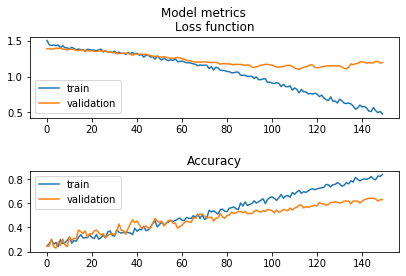

In [73]:
plot_loss_acc(hist) #150 epochs

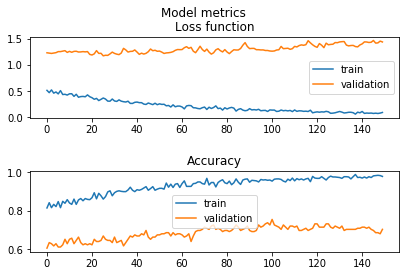

In [75]:
plot_loss_acc(hist) #150+150 epochs

In [47]:
save_model(model_, suffix='img_augm_n_epoch-85+50')

Сохранение модели в: C:\Users\User\Jupiter\usefull notebooks\models\23-09-2020_20-34-49_img_augm_n_epoch-85+50.h5...


'C:\\Users\\User\\Jupiter\\usefull notebooks\\models\\23-09-2020_20-34-49_img_augm_n_epoch-85+50.h5'

**Estimate our predictions on test data**

In [31]:
# Load the model with no of epochs 15+70

model_70_ep_path = r'models\18-09-2020_03-21-22_n_epoch-70.h5'

model_70_ep = tf.keras.models.load_model(model_70_ep_path)

In [33]:
# model_70_ep.summary()

In [28]:
test_data = create_data_batches(X_test, y_test, val_test_data=True)

Validation or test data batches are creating...


In [35]:
# Make predictios on test data
predictions = model_70_ep.predict(test_data, verbose=1)

4/4 [==============================] - 8s 2s/step


In [92]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model_70_ep.evaluate(test_data, batch_size=BATCH_SIZE)
print("test loss, test acc:", results)

Evaluate on test data
4/4 [==============================] - 5s 1s/step - loss: 0.8833 - accuracy: 0.7255
test loss, test acc: [0.883345365524292, 0.7254902124404907]


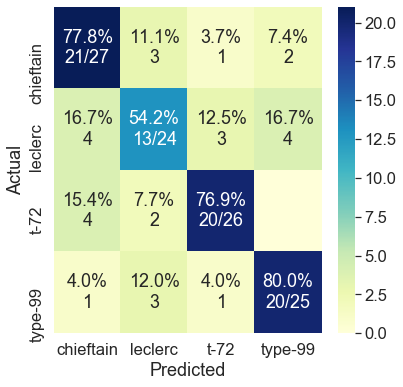

In [140]:
plot_cm(y_test_types, y_pred)

In [53]:
# Create function that unbatch predictions
def unbatchify(data):
    """
    Turn batch (image, label) into 2 arrays: images and labels
    """
    images = []
    labels = []
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_types[np.argmax(label)])
  
    return images, labels

In [55]:
# Unbatch the predictions
test_images, test_labels = unbatchify(test_data)
test_images[0], test_labels[0]

(array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 'type-99')

Now we need to visualize the data

In [49]:
def plot_pred (prediction_probabilities, labels, images, n=1):
    """
    Visualize predicts, get true label of tank type for n sample
    """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

    # Выведем спрогнизрованную разметку
    pred_label = get_pred_label(pred_prob)

    # Нарисуем изображение и уберем оси
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Поменяем цвет текста названия рисунка в зависимости от правильности прогноза
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Создадим название рисунка: прогноз, вероятность прогноза, и истинное значение
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                color=color)

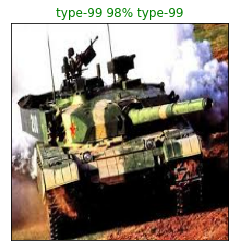

In [50]:
plot_pred(prediction_probabilities=predictions,
          labels=test_labels,
          images=test_images,
          n=7)

Now let's vizualize the probabilities of our predictions

In [50]:
def plot_pred_conf (prediction_probabilities, labels, n=1):
    """
    Returns probabilities of true label for n sample
    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]

    # Выведем предсказанную разметку
    pred_label = get_pred_label(pred_prob)

    # Найдем топ-10 индексов с максимальной вероятностью
    pred_indexes = pred_prob.argsort()[-4:][::-1]
    # Найдем 10 наибольших вероятностей прогноза
    pred_values = pred_prob[pred_indexes]
    # Найдем 10 спрогнозированных пород
    pred_labels = unique_types[pred_indexes]

    # Настроим визуализацию результатов
    top_plot = plt.bar(np.arange(len(pred_labels)),
                       pred_values,
                       color="grey")
    plt.xticks(np.arange(len(pred_labels)),
               labels=pred_labels,
               rotation="vertical")
  
    # Изменим цвет истинного значения
    if np.isin(true_label, pred_labels):
        top_plot[np.argmax(pred_labels == true_label)].set_color("green")
    else:
        pass

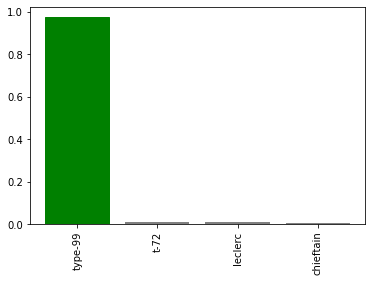

In [52]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=test_labels, n=7)

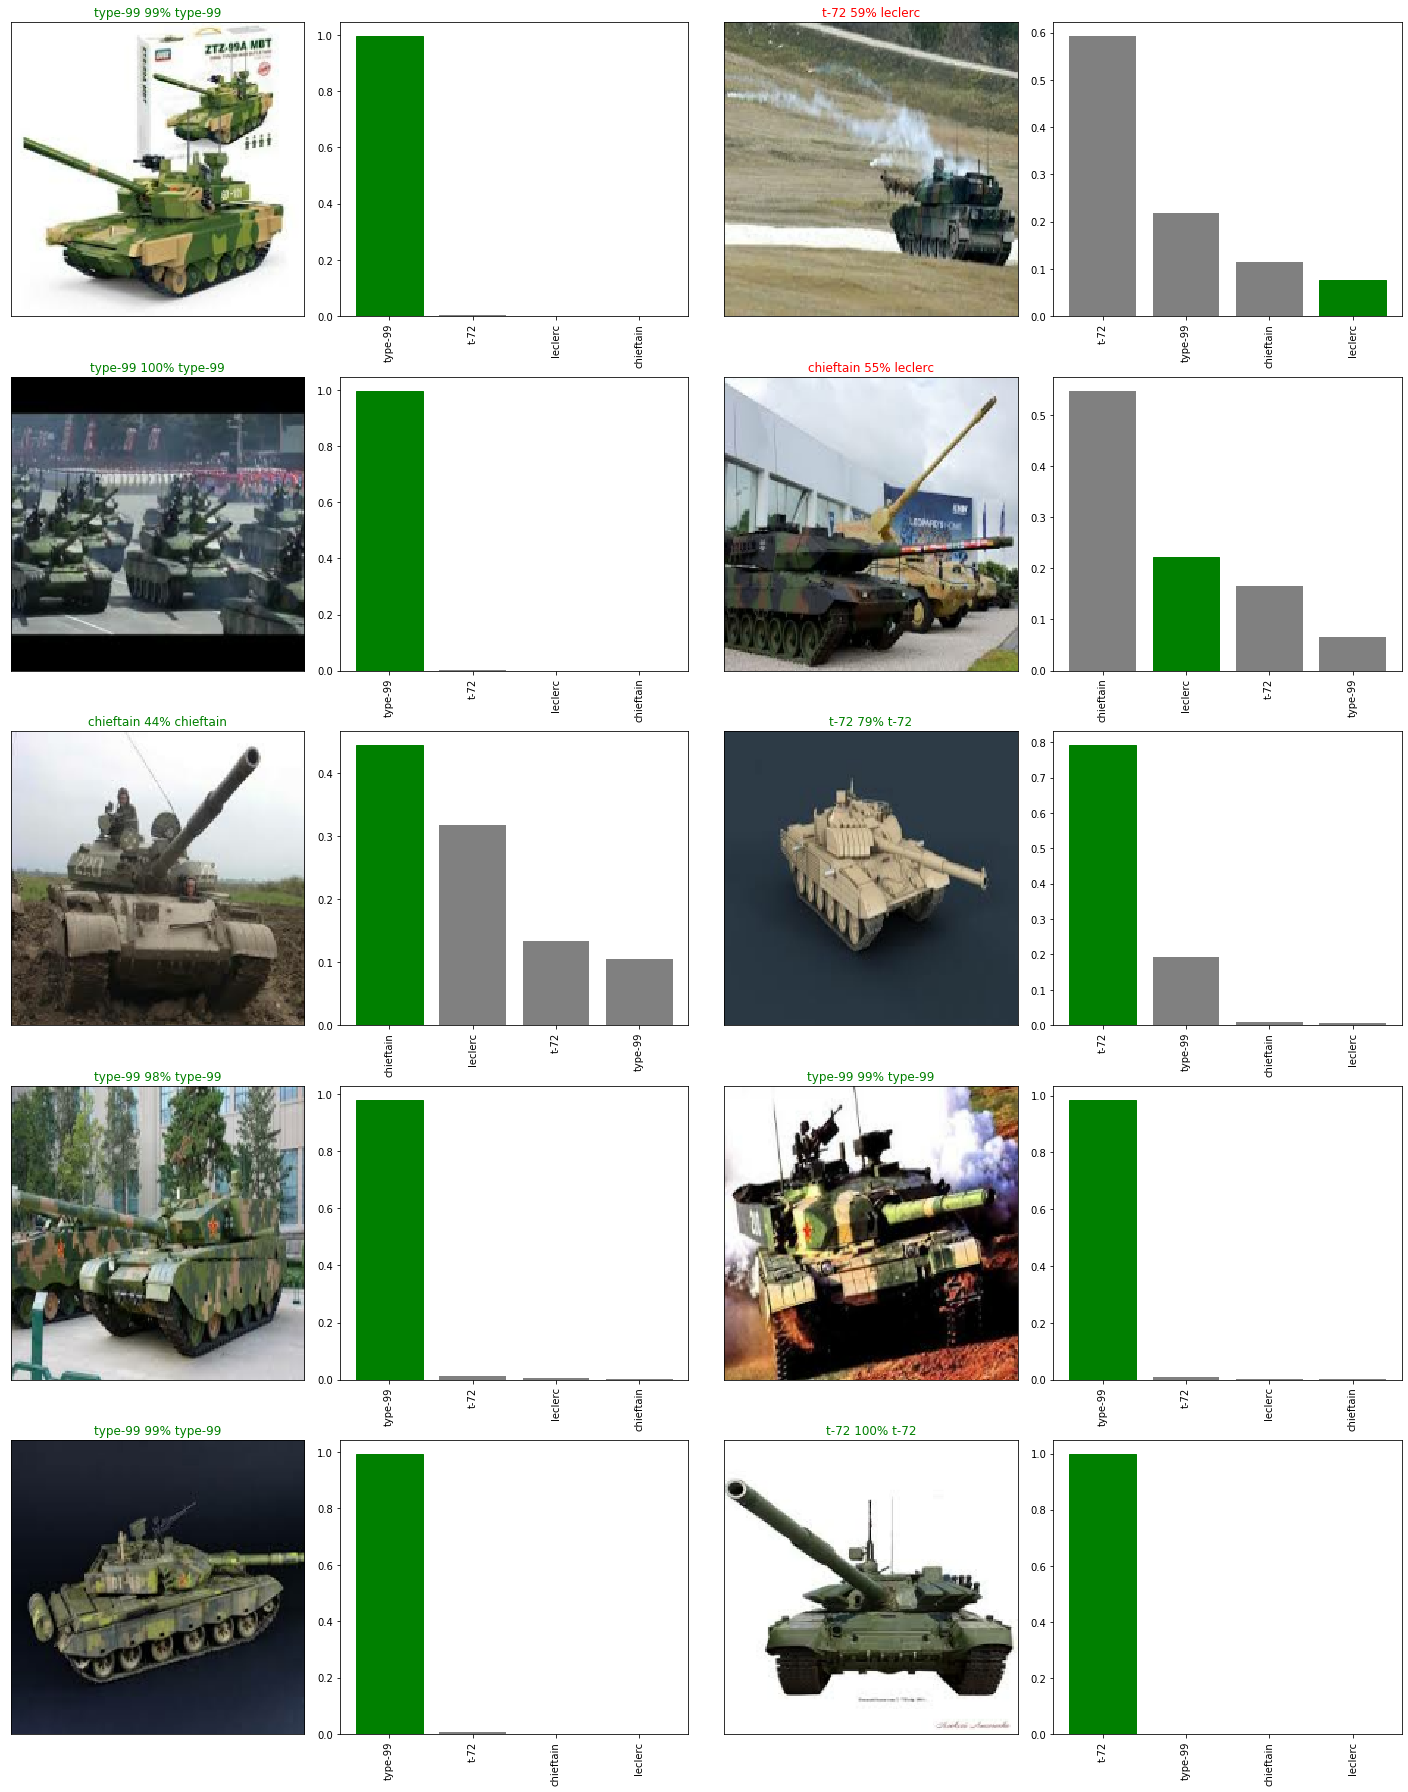

In [53]:
# Check predictions and labels
i_multiplier = 0
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
              labels=test_labels,
              images=test_images,
              n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
                   labels=test_labels,
                   n=i+i_multiplier)
    plt.tight_layout(h_pad=1.0)
plt.show()

In [51]:
# Function for plotting images and predictions
def plot_and_conf(prediction_probabilities, labels, 
                  images, num_rows, num_cols, misclassified_label):
    """
    Plots images in num_rows and num_cols wich were misclassified  
    and probabilities of tank type. 
    variable misclassified_label should be string of desired label, for example: 'type-99'.
    """
    num_images = num_rows*num_cols
    plt.figure(figsize=(10*num_cols, 5*num_rows))
    
    misscl=[]
    
    for m in range(len(predictions)):
        if (labels[m]==misclassified_label) and (get_pred_label(prediction_probabilities[m])!=misclassified_label):
            misscl.append(m)
        else:
            pass    
        
    for i in range(len(misscl)):

        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_pred(prediction_probabilities=predictions,
                  labels=labels,
                  images=images,
                  n=misscl[i])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_pred_conf(prediction_probabilities=predictions,
                       labels=labels,
                       n=misscl[i])
        plt.tight_layout(h_pad=1.0)
    plt.show()
  

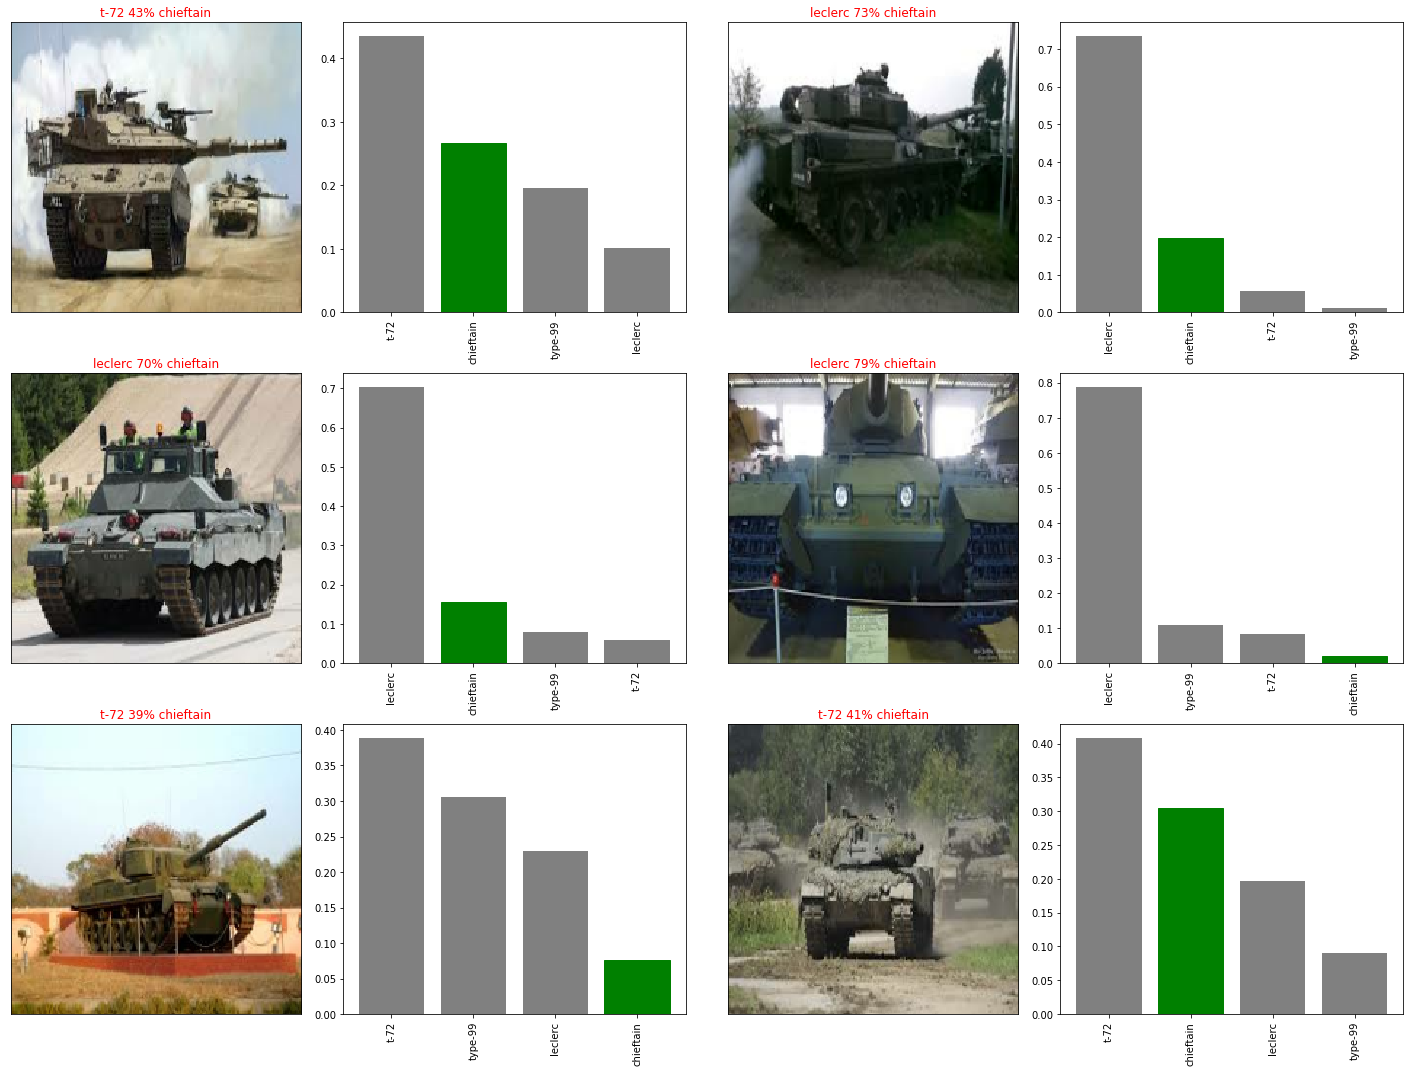

In [80]:
plot_and_conf(predictions, test_labels, test_images, 3, 2, 'chieftain')

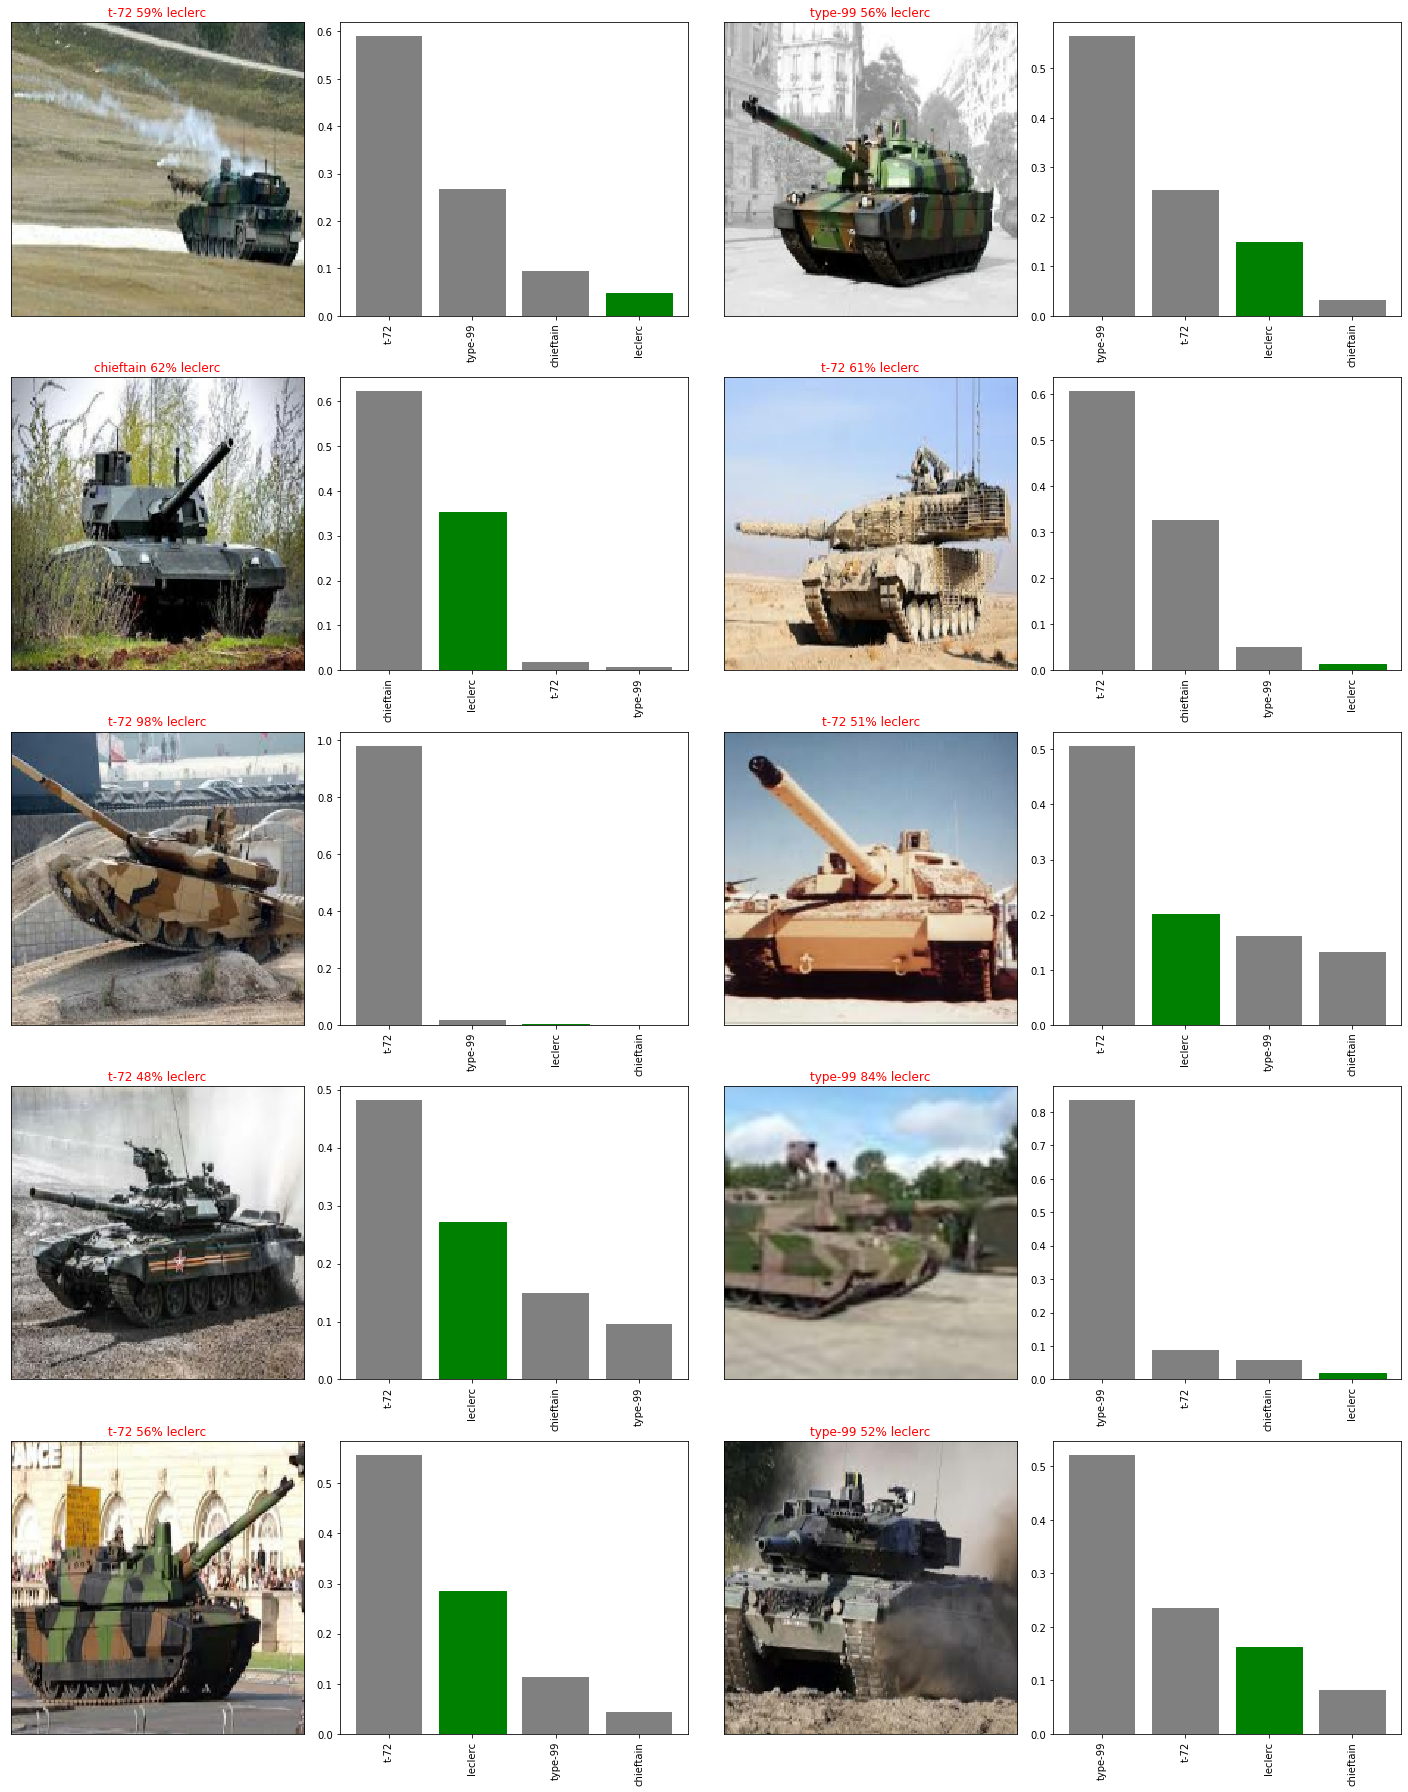

In [76]:
plot_and_conf(predictions, test_labels, test_images, 5, 2, 'leclerc')

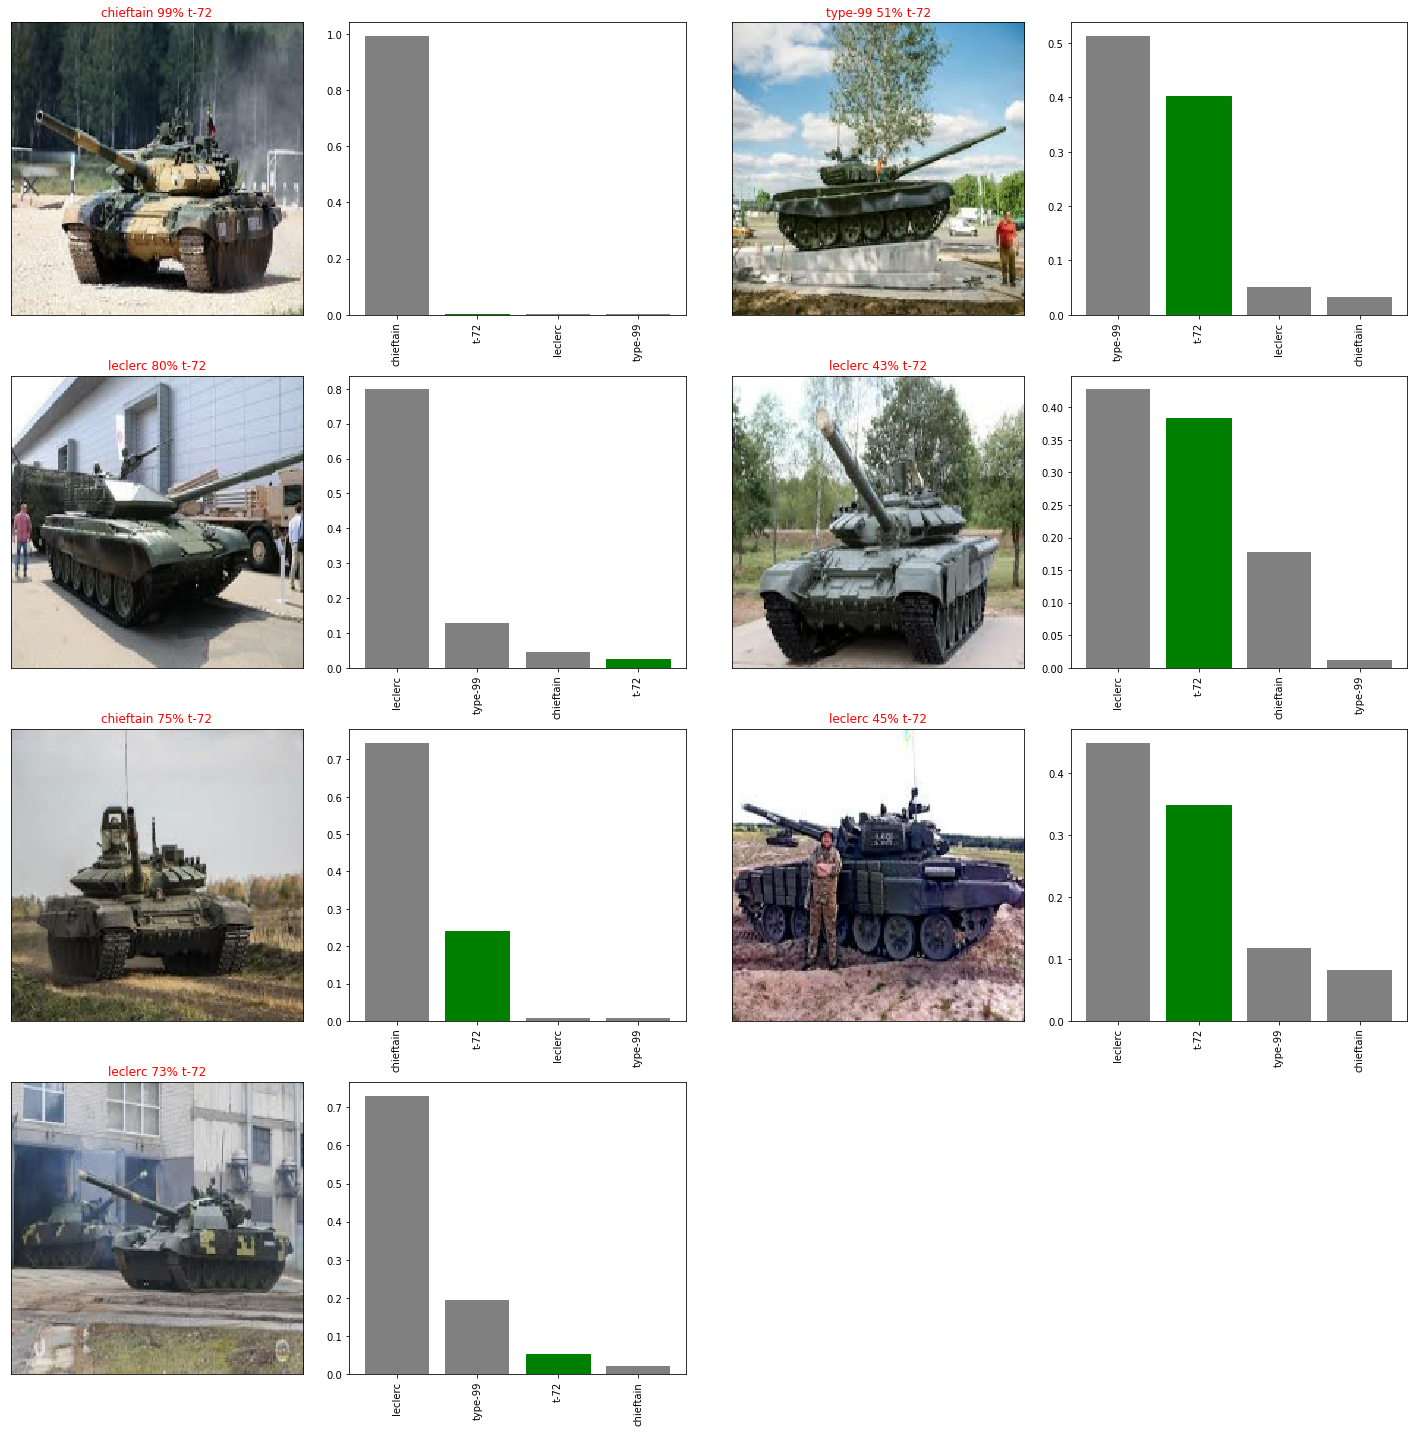

In [77]:
plot_and_conf(predictions, test_labels, test_images, 4, 2, 't-72')

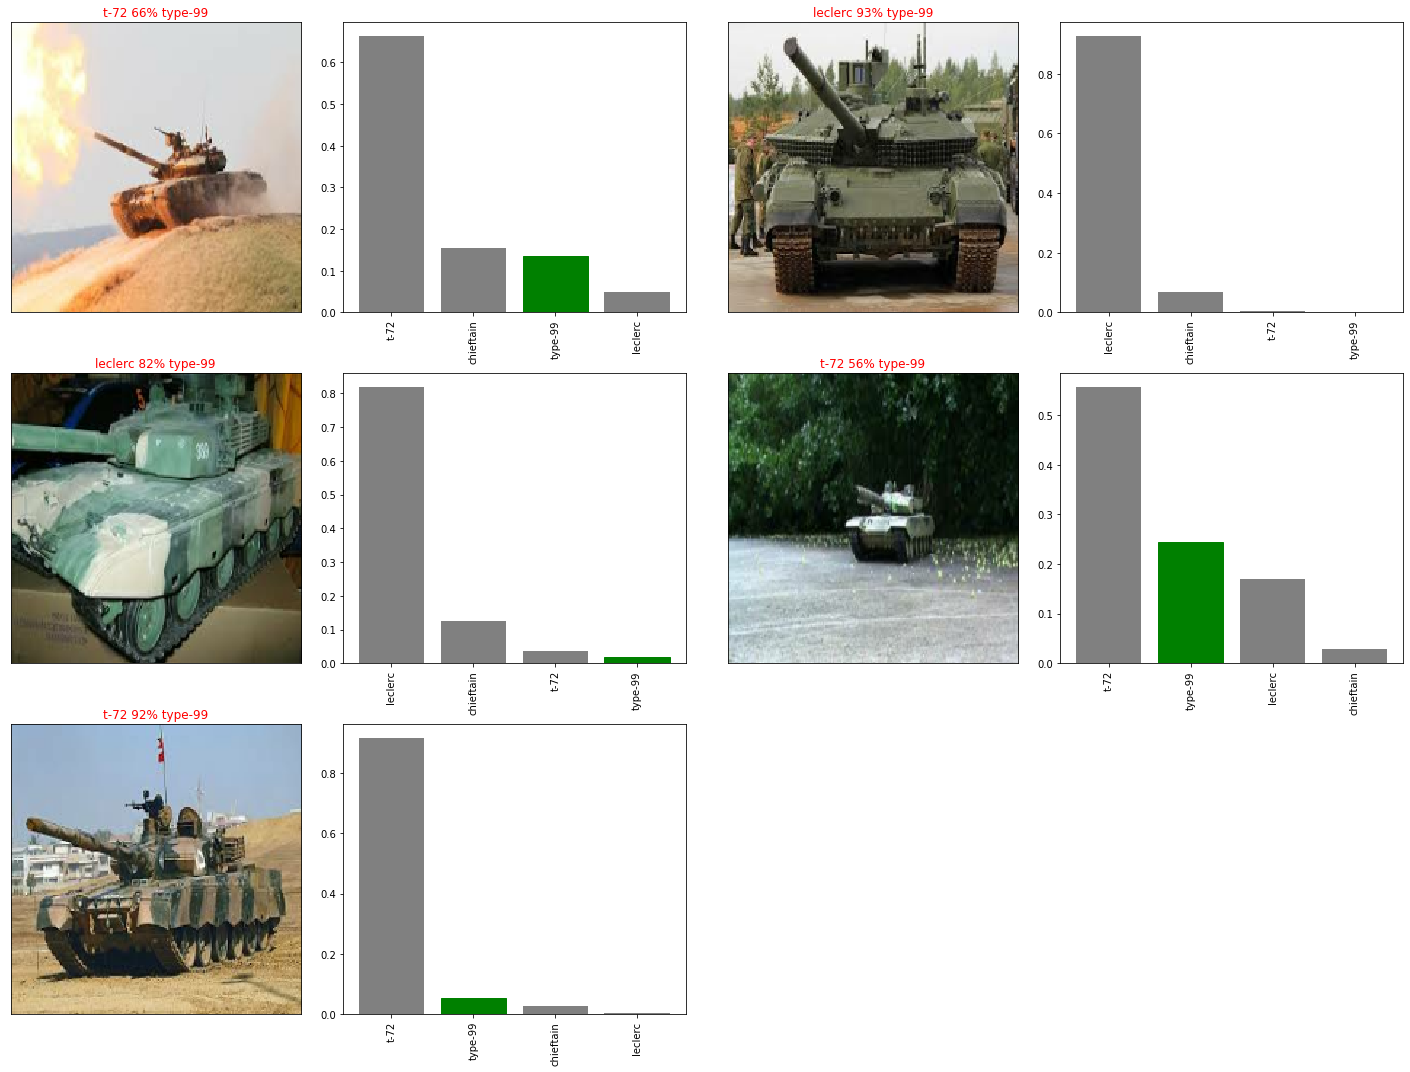

In [78]:
plot_and_conf(predictions, test_labels, test_images, 3, 2, 'type-99')

# Feature work

1. Recheck the tank types labels more carefully (may be with help of specialists)
2. Add more data